In [1]:
import torch
from torch import nan
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [2]:
train_data = datasets.FashionMNIST(
    root="data", #where to download data
    train=True, #do we want the training dataset?
    download=True, #do we want to download our data?
    transform=torchvision.transforms.ToTensor(), #how do we want to transform the data?
    target_transform=None #how do we want to transform the labels
  
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
#show the len of train and test data
len(train_data), len(test_data)

(60000, 10000)

In [4]:
#see the first training  example
image, label = train_data[0]
image, label

/Users/antonis/miniforge3/envs/dfl_test/lib/python3.8/site-packages/torchvision/transforms/functional.py:79: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = test_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = test_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets #print the different values for the labels of each feature.

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
image.shape, label #show the shape of image and label
#color channel, height, width


(torch.Size([1, 28, 28]), 9)

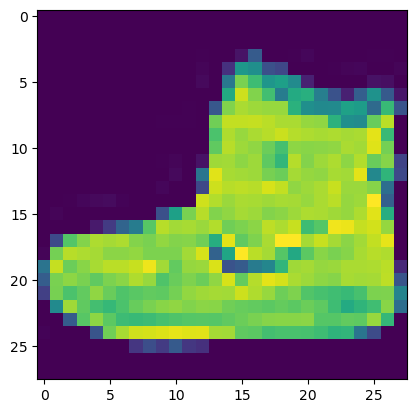

In [9]:
plt.imshow(image.squeeze()) #we need to remove the 1 from index 0 because matplotlib excpects height,width


(-0.5, 27.5, 27.5, -0.5)

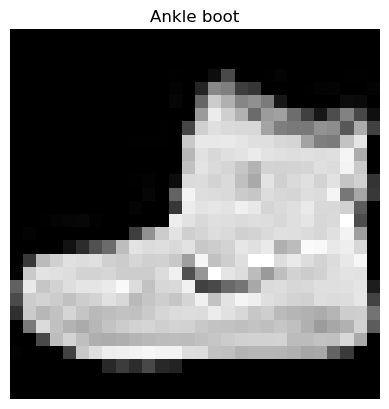

In [10]:
#if we want to see the image with different color
plt.imshow(image.squeeze(),
           cmap="gray")
plt.title(class_names[label])
plt.axis(False)

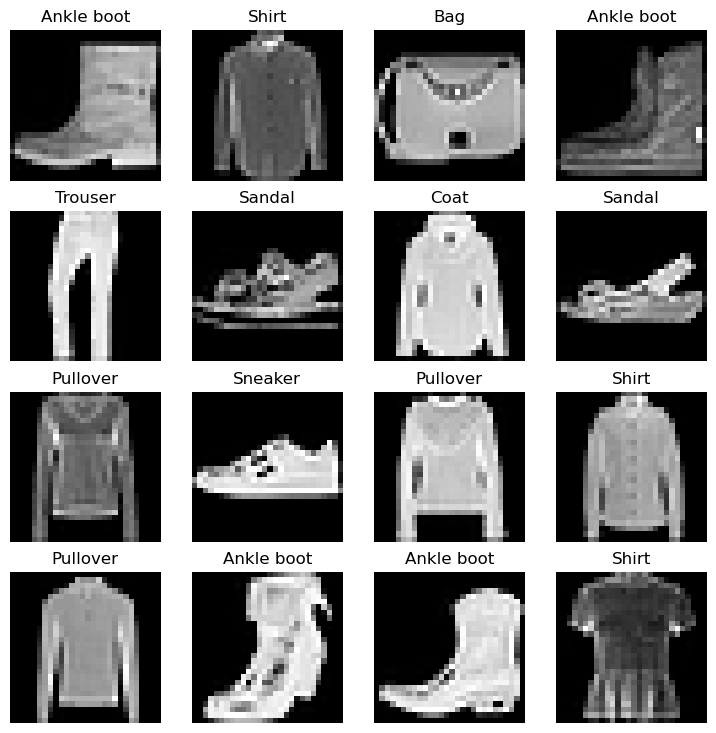

In [11]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols,i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)


In [12]:
#dataloaders

from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size= BATCH_SIZE,
                             shuffle= False) #good practice for test set to have no shuffle




In [13]:
#check what's inside the dataloaders
train_features_batch, train_labels_batch = next(iter(train_dataloader)) #turn into index and get the next batch

train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

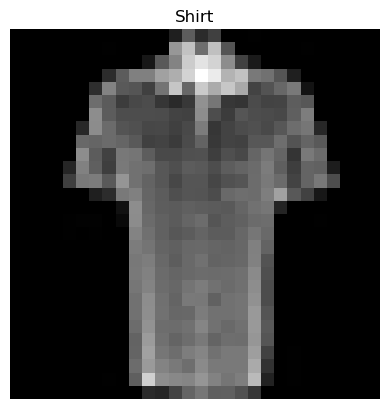

In [14]:
#show a sample 
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap= "gray" )
plt.title(class_names[label])
plt.axis(False)

In [15]:
#creating our baseline model
from torch import nn 
# create a flatten model
flatten_model = nn.Flatten()

x = train_features_batch[0]
x.shape

output = flatten_model(x)
output.shape , output.squeeze()



(torch.Size([1, 784]),
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
         0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
     

In [16]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_layers: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_layers),
            nn.Linear(hidden_layers, output_shape)
            
        )
    def forward(self,x):
        return self.layer_stack(x)
            

In [17]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_layers=10,
    output_shape=len(class_names)) # one for every class

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x).shape#s
#s

torch.Size([1, 10])

In [19]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [20]:
#loss function -> multiclass requires cross entropy

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

#getting the accuracy from the helper function
from helper_functions import accuracy_fn



In [21]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    total_time = end - start
    print(f"train time on {device} is {total_time:3f}")
    return total_time

In [22]:
start_time = timer()
#some code boes in here
end_time = timer()

print(print_train_time(start=start_time,end=end_time, device= 'cpu'))

train time on cpu is 0.000011
1.0792000000314772e-05


In [23]:
#progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"epoch numner {epoch}\n-----------")
    train_loss = 0
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss #accumulate train loss
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if batch%400 == 0 :
            print(f"looked at batch {batch*len(X)}/{len(train_dataloader.dataset)}")

        
    train_loss /= len(train_dataloader)


    #testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            test_pred = model_0(X_test)
        
            test_loss += loss_fn(test_pred, y_test)
        
            test_acc += accuracy_fn(y_true= y_test, y_pred= test_pred.argmax(dim=1)) #output of test_pred is logits
        #in order to be y_treu and y_pred of the same format we need to use argmax with dim =1
        
        
        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)
    
    print(f"\n train loss: {train_loss: .4f} and test loss is {test_loss: .4f} and acc: {test_acc: .4f}")

train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end= train_time_end_on_cpu,
                                            device= str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

epoch numner 0
-----------
looked at batch 0/60000
looked at batch 12800/60000
looked at batch 25600/60000
looked at batch 38400/60000
looked at batch 51200/60000

 train loss:  0.5904 and test loss is  0.5095 and acc:  82.0387
epoch numner 1
-----------
looked at batch 0/60000
looked at batch 12800/60000
looked at batch 25600/60000
looked at batch 38400/60000
looked at batch 51200/60000

 train loss:  0.4763 and test loss is  0.4799 and acc:  83.1969
epoch numner 2
-----------
looked at batch 0/60000
looked at batch 12800/60000
looked at batch 25600/60000
looked at batch 38400/60000
looked at batch 51200/60000

 train loss:  0.4550 and test loss is  0.4766 and acc:  83.4265
train time on cpu is 7.202580


In [24]:
device = torch.device("mps")
device

device(type='mps')

In [49]:


#make predictions and get the model 0 results

torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = device):
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            X = X.to(device)
            y= y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true= y, y_pred= y_pred.argmax(dim=1))
            
        loss /=len(data_loader)
        acc /= len(data_loader)
    return {"model name": model.__class__.__name__,
            "model loss": loss.item(),
            "model acc": acc}
    
# model_0_results = eval_model(model=model_0,
#                              data_loader=test_dataloader,
#                              loss_fn=loss_fn,
#                              accuracy_fn=accuracy_fn,
#                              device= device)

# model_0_results

In [50]:
#setting up device agnostic code


In [51]:
#building model 1 with non linearity 

class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_layers: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), #inputs into a single vector
            nn.Linear(input_shape, hidden_layers),
            nn.ReLU(),
            nn.Linear(hidden_layers, output_shape),
            nn.ReLU()
            
        )
    def forward(self,x: torch.Tensor):
        return self.layer_stack(x)

In [52]:
#create an instance of model 1 in mps
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(784,10,len(class_names)).to(device)

next(model_1.parameters()).device #making sure it's on the gpu

device(type='mps', index=0)

In [53]:
#loss function, optimzer and accuracy

loss_fn = nn.CrossEntropyLoss() #measures how wrong our model is 
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1) #changes the parameters of our model in order to
#get a smaller loss 



In [54]:
# create a function where we can train our model

def train_step(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0,0 
    
    model.train()    
    
    for batch, (X,y) in enumerate(data_loader):
        
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss #accumulate train loss
        train_acc += accuracy_fn(y_true= y, y_pred= y_pred.argmax(dim=1)) #logits-> prediction labels
        
        
        
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"train_loss: {train_loss: .5f} and train_acc: {train_acc: .5f}")

In [55]:
#Create a function where we can test our model

def test_step(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               accuracy_fn,
               device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device), y.to(device)
            
            test_pred = model(X)
        
            test_loss += loss_fn(test_pred, y)
        
            test_acc += accuracy_fn(y_true= y, y_pred= test_pred.argmax(dim=1)) #output of test_pred is logits
        #in order to be y_true and y_pred of the same format we need to use argmax with dim =1
        
        test_loss /= len(data_loader)

        test_acc /= len(data_loader)
        print(f"\n test loss: {test_loss : .4f} and test acc: {test_acc: .4f}")




In [56]:
torch.manual_seed(42)
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"epoch numner {epoch}\n-----------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn= loss_fn,
               optimizer= optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_on_gpu = timer()
    
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end= train_time_end_on_gpu,
                                            device= str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

epoch numner 0
-----------
train_loss:  1.09199 and train_acc:  61.34333

 test loss:  0.9564 and test acc:  64.9960
epoch numner 1
-----------
train_loss:  0.78097 and train_acc:  71.93667

 test loss:  0.7261 and test acc:  73.9916
epoch numner 2
-----------
train_loss:  0.67040 and train_acc:  75.94000

 test loss:  0.6901 and test acc:  74.8103
train time on mps:0 is 21.722680


In [57]:
total_train_time_model_1

21.72267983400002

In [58]:
model_1_results = eval_model(model=model_1,
                              data_loader=test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn,
                              device= device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'FashionMNISTModelV1',
 'model loss': 0.6900656223297119,
 'model acc': 74.810303514377}

In [59]:
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [60]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, #only one color channel
                              hidden_units=10,
                              output_shape=len(class_names))
model_2.to(device)

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [61]:
torch.manual_seed(42)

#create a batch of images
images = torch.randn(size = (32,3,64,64))
test_image = images[0]
images.shape,test_image.shape

(torch.Size([32, 3, 64, 64]), torch.Size([3, 64, 64]))

In [62]:
#create a single conv2 layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [63]:
#create a single max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_output = max_pool_layer(conv_output)
max_pool_output.shape

torch.Size([10, 31, 31])

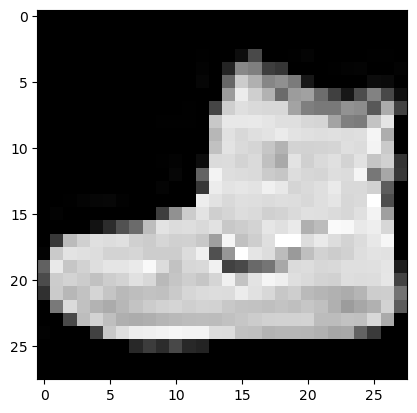

In [64]:
plt.imshow(image.squeeze(),cmap="gray")

In [65]:
# #pass the random image through our model 2
# image.shape
# rand_image_tensor = torch.randn(size=(1,28,28)).to(device)
# rand_image_tensor.device
# model_2(rand_image_tensor)

#crashes the kernel


In [66]:
#loss function and optimizer for model 2


loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

model_2.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
           

In [67]:
torch.manual_seed(42)
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"epoch numner {epoch}\n-----------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn= loss_fn,
               optimizer= optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_on_gpu = timer()
    
total_train_time_model_2 = print_train_time(start=train_time_start_on_gpu,
                                            end= train_time_end_on_gpu,
                                            device= str(next(model_2.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

epoch numner 0
-----------
train_loss:  0.59601 and train_acc:  78.45000

 test loss:  0.3975 and test acc:  85.7827
epoch numner 1
-----------
train_loss:  0.36561 and train_acc:  86.82667

 test loss:  0.3497 and test acc:  87.1506
epoch numner 2
-----------
train_loss:  0.32694 and train_acc:  88.24667

 test loss:  0.3285 and test acc:  87.8594
train time on mps:0 is 30.915170


In [68]:
#get model 2 results

model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'FashionMNISTModelV2',
 'model loss': 0.32852885127067566,
 'model acc': 87.8594249201278}

In [71]:
import pandas as pd

compare_results = pd.DataFrame([model_1_results,model_2_results, model_2_results])
compare_results

,model name,model loss,model acc
0,FashionMNISTModelV1,0.690066,74.810304
1,FashionMNISTModelV2,0.328529,87.859425
2,FashionMNISTModelV2,0.328529,87.859425


In [72]:
compare_results["training time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model name,model loss,model acc,training time
0,FashionMNISTModelV1,0.690066,74.810304,7.20258
1,FashionMNISTModelV2,0.328529,87.859425,21.72268
2,FashionMNISTModelV2,0.328529,87.859425,30.91517


Text(0, 0.5, 'model')

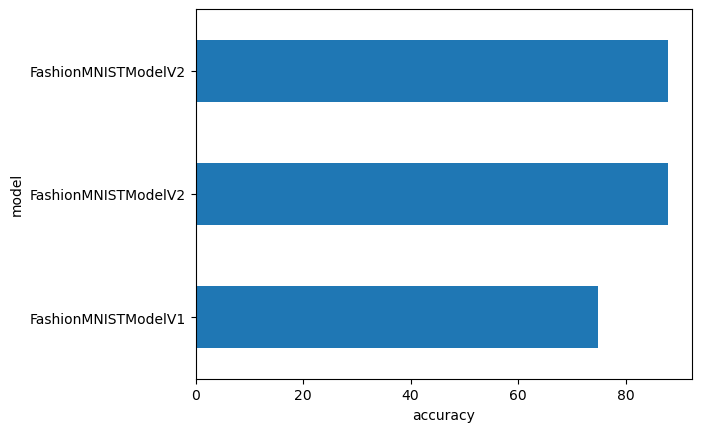

In [77]:
compare_results.set_index("model name")["model acc"].plot(kind="barh")
plt.xlabel("accuracy")
plt.ylabel("model")

In [78]:
#create a function that makes predictions
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            #prepare the sample by adding a batch dimension 
            sample=torch.unsqueeze(sample,dim=0).to(device)
            
            #forward pass, model outputs logit
            pred_logits = model(sample)
            
            #get the probabilities instead of the logits
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)
            
            #matplot lib works ONLY ON CPU
            pred_probs.append(pred_prob.to('cpu'))
            #pred_probs.append(pred_probs.cpu()) way he is using it
            
    #stack the pred_probs in order to turn the list into a tensor
    return torch.stack(pred_probs)
            
            
            
    